In [54]:
import pandas as pd
import numpy as np

In [1]:
pip install requests


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-3.0.1-cp310-cp310-win_amd64.whl (96 kB)
  Using cached urllib3-1.26.14-py2.py3-none-any.whl (140 kB)
     -------------------------------------- 155.3/155.3 KB 1.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [55]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [56]:
df.shape #there are 309 rows and 9 columns

(301, 9)

In [57]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [58]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [59]:
# Check misssing value
df.isnull().sum()    # there are no null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [61]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [62]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [63]:
final_dataset=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [64]:
final_dataset['current_year']=2023

In [65]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [66]:
final_dataset['number_years']=final_dataset['current_year']-final_dataset['Year']

In [67]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,number_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [68]:
final_dataset=final_dataset.drop(['Year','current_year'],axis=1)

In [69]:
final_df=pd.get_dummies(final_dataset,drop_first=True)

In [70]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,number_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [71]:
import seaborn as sns

In [72]:
#sns.pairplot(final_df)

In [73]:
import matplotlib.pyplot as plt

<AxesSubplot:>

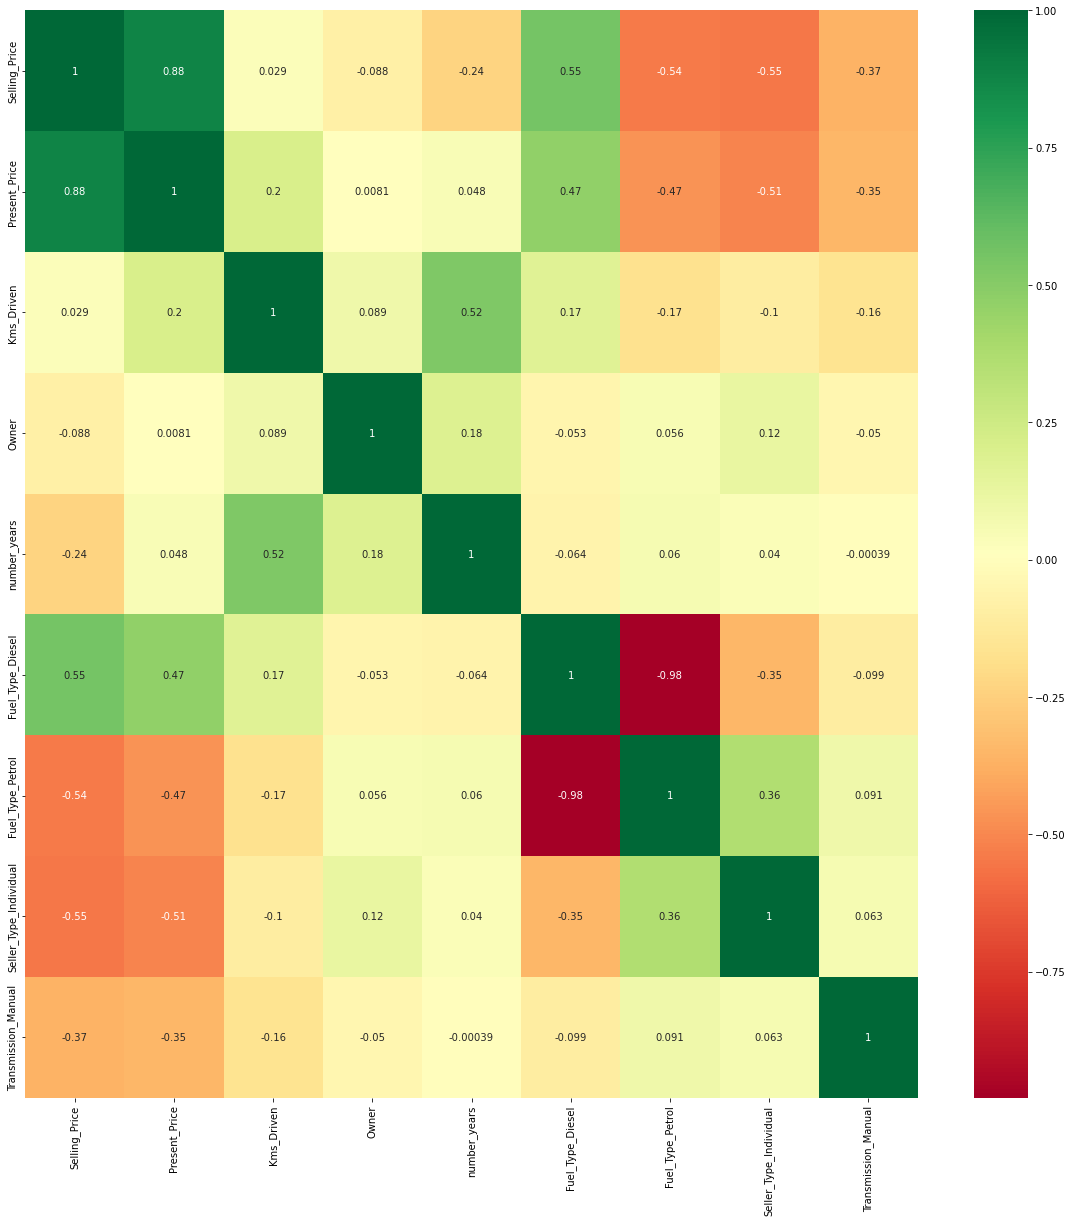

In [74]:
corrmat=final_df.corr()
top_Cor_feat=corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True,cmap='RdYlGn')


In [75]:
x= final_df.drop('Selling_Price',axis=1)
y=final_df['Selling_Price']

In [76]:
x.head()

,Present_Price,Kms_Driven,Owner,number_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [77]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [78]:
# Feature importence
from sklearn.ensemble import ExtraTreesRegressor

In [79]:
model=ExtraTreesRegressor()


In [80]:
model.fit(x,y)

ExtraTreesRegressor()

In [81]:
print(model.feature_importances_)

[3.90330114e-01 4.52110180e-02 3.80945585e-04 7.18322093e-02
 2.28262226e-01 1.00041899e-02 1.26857553e-01 1.27121745e-01]


In [82]:
# plot graph for better visualization of feature importence

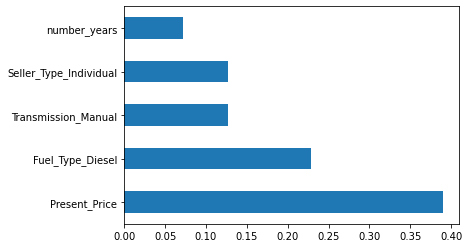

In [83]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=100)

In [86]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(240, 8)
(61, 8)
(240,)
(61,)


In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rf_random=RandomForestRegressor()

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [91]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [92]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [93]:
rf_random=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=100, n_jobs = 1)
rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   2.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=100, scoring='neg_mean_squared_error',
                   verbose=2)

In [94]:
y_pred=rf_random.predict(xtest)
y_pred

array([ 0.19952727,  2.52091818,  1.15910909,  1.05855455,  2.88245455,
        4.95923636,  5.18027273,  3.06512727,  0.59742727,  3.42354545,
        0.36624545,  5.72438182,  7.42968182,  3.51268182,  1.62409091,
        6.93212727, 14.00073636,  0.21872727,  7.4515    ,  1.1901    ,
        0.75566364,  9.39078182,  4.67345455,  0.44558182,  7.59954545,
       10.71818182,  0.45328182,  4.55627273,  0.60064545,  0.93102727,
        6.10546364, 14.11963636,  4.73336364,  6.62836364,  7.95009091,
        4.36079091,  3.66205455, 14.49509091,  2.87877273,  6.60313636,
        7.45040909,  5.23623636,  5.07640909,  4.717     ,  2.97831818,
        0.44928182,  0.73629091,  3.81330909,  0.59230909,  2.39404545,
       21.94231818,  1.30401818,  4.27269091,  7.93958182,  5.86180909,
        1.96368182,  8.86589091,  1.58906364,  3.17945455,  3.00700909,
        0.22644545])

C:\Users\SAMEER AHMED MD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

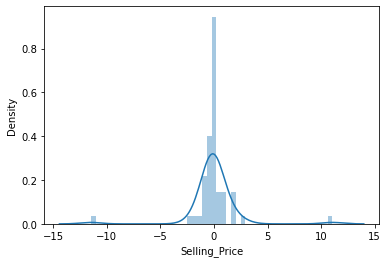

In [95]:
sns.distplot(ytest-y_pred)

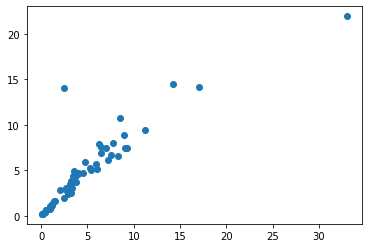

In [96]:
plt.scatter(ytest,y_pred)

In [97]:
import pickle


In [98]:
file=pickle.dump(rf_random,open('rf_reg_model.pkl','wb'))